In [1]:
%load_ext autoreload
%autoreload 2
import phate
import pandas as pd


C:\Users\lingxchen2\AppData\Local\Continuum\miniconda3\lib\site-packages\anndata\base.py:18: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
tree, branches = phate.tree.gen_dla(n_dim = 200, n_branch = 10, branch_length = 30, 
                                    rand_multiplier = 2, seed=37, sigma = 5)
index_name = 'cell_id'
cluster_label = 'cluster'
tree_df = pd.DataFrame(tree)
tree_df.index.name = index_name
meta_df = pd.DataFrame(branches, columns=[cluster_label])
meta_df.index.name = index_name

In [3]:
import run_deepmf

pca_df, tsne_df, umap_df, phate_df = run_deepmf.run_embedding(tree_df, tree_df.index, index_name)


Calculating PHATE...
  Running PHATE on 300 observations and 200 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.01 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.05 seconds.
Calculated PHATE in 0.10 seconds.


C:\Users\lingxchen2\AppData\Local\Continuum\miniconda3\lib\site-packages\umap\umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "..\..\..\..\AppData\Local\Continuum\miniconda3\lib\site-packages\umap\umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
C:\Users\lingxchen2\AppData\Local\Continuum\miniconda3\lib\site-packages\numba\compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "..\..\..\..\AppData\Local\Continuum\miniconda3\lib\site-packages\umap\umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
C:\Users\lingxchen2\AppData\Local\Co

In [81]:
import sys
import os
import numpy as np
import torch
import DeepMF
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = tree
nrun = 1
device = 'cpu'
M, N = data.shape
K = 2

device = torch.device(device)
L = 3
n_batch = 10000

epoches = 1000
model = DeepMF.DeepMF(M, N, K=K, L=L,
                          learning_rate=1e-2,
                          epoches=epoches,
                          neighbor_proximity = 'KL',
                          neighbor_k = 30,
                          device=device, problem='regression', data_type='impute')
model.fit(data, n_batch, delta=0.00001, alpha=1)


y_pred = model.predict(data)
U, V = model.save_U_V()
U_df = pd.DataFrame(U, columns=['e_DeepMF_U1', 'e_DeepMF_U2'])

epoch=0	batch=0	21.731548309326172	0.0	11.403294563293457	10.328252792358398
epoch=1	batch=0	21.723567962646484	0.0	11.400810241699219	10.32275676727295
epoch=2	batch=0	21.715099334716797	0.0	11.397676467895508	10.317421913146973
epoch=3	batch=0	21.706153869628906	0.0	11.39389419555664	10.312260627746582
epoch=4	batch=0	21.696748733520508	0.0	11.389469146728516	10.307279586791992
epoch=5	batch=0	21.686899185180664	0.0	11.384407997131348	10.302491188049316
epoch=6	batch=0	21.676620483398438	0.0	11.378719329833984	10.297900199890137
epoch=7	batch=0	21.665925979614258	0.0	11.372413635253906	10.293512344360352
epoch=8	batch=0	21.654830932617188	0.0	11.36550521850586	10.289325714111328
epoch=9	batch=0	21.643348693847656	0.0	11.358011245727539	10.285338401794434
epoch=10	batch=0	21.63149642944336	0.0	11.349952697753906	10.28154468536377
epoch=11	batch=0	21.619293212890625	0.0	11.34135627746582	10.277937889099121
epoch=12	batch=0	21.606761932373047	0.0	11.332250595092773	10.27451229095459
epo

epoch=106	batch=0	20.982328414916992	0.0	10.895930290222168	10.086398124694824
epoch=107	batch=0	20.978063583374023	0.0	10.894530296325684	10.08353328704834
epoch=108	batch=0	20.97378921508789	0.0	10.893138885498047	10.080650329589844
epoch=109	batch=0	20.969505310058594	0.0	10.891756057739258	10.077749252319336
epoch=110	batch=0	20.965213775634766	0.0	10.890381813049316	10.074832916259766
epoch=111	batch=0	20.960918426513672	0.0	10.889016151428223	10.07190227508545
epoch=112	batch=0	20.956615447998047	0.0	10.88765811920166	10.068957328796387
epoch=113	batch=0	20.952308654785156	0.0	10.886307716369629	10.066001892089844
epoch=114	batch=0	20.947999954223633	0.0	10.884963989257812	10.06303596496582
epoch=115	batch=0	20.943689346313477	0.0	10.883627891540527	10.06006145477295
epoch=116	batch=0	20.93937873840332	0.0	10.882298469543457	10.057080268859863
epoch=117	batch=0	20.935070037841797	0.0	10.880975723266602	10.054093360900879
epoch=118	batch=0	20.930763244628906	0.0	10.879658699035645

epoch=211	batch=0	20.66181182861328	0.0	10.773027420043945	9.888785362243652
epoch=212	batch=0	20.660011291503906	0.0	10.771780014038086	9.888230323791504
epoch=213	batch=0	20.65821075439453	0.0	10.770523071289062	9.887688636779785
epoch=214	batch=0	20.65641975402832	0.0	10.769259452819824	9.887160301208496
epoch=215	batch=0	20.654632568359375	0.0	10.767987251281738	9.88664436340332
epoch=216	batch=0	20.652847290039062	0.0	10.766706466674805	9.886140823364258
epoch=217	batch=0	20.65106773376465	0.0	10.76541805267334	9.885649681091309
epoch=218	batch=0	20.6492919921875	0.0	10.764122009277344	9.885169982910156
epoch=219	batch=0	20.647518157958984	0.0	10.7628173828125	9.8847017288208
epoch=220	batch=0	20.645750045776367	0.0	10.761505126953125	9.884244918823242
epoch=221	batch=0	20.643983840942383	0.0	10.760185241699219	9.883798599243164
epoch=222	batch=0	20.64221954345703	0.0	10.758856773376465	9.883362770080566
epoch=223	batch=0	20.640457153320312	0.0	10.75752067565918	9.882936477661133


epoch=317	batch=0	20.486818313598633	0.0	10.623364448547363	9.86345386505127
epoch=318	batch=0	20.485347747802734	0.0	10.622030258178711	9.863317489624023
epoch=319	batch=0	20.48387908935547	0.0	10.620697021484375	9.863182067871094
epoch=320	batch=0	20.48241424560547	0.0	10.619366645812988	9.863046646118164
epoch=321	batch=0	20.48094940185547	0.0	10.618037223815918	9.862911224365234
epoch=322	batch=0	20.4794864654541	0.0	10.616710662841797	9.862775802612305
epoch=323	batch=0	20.47802734375	0.0	10.615385055541992	9.862641334533691
epoch=324	batch=0	20.47657012939453	0.0	10.614062309265137	9.862506866455078
epoch=325	batch=0	20.475112915039062	0.0	10.612740516662598	9.862372398376465
epoch=326	batch=0	20.47365951538086	0.0	10.611422538757324	9.862237930297852
epoch=327	batch=0	20.472209930419922	0.0	10.610106468200684	9.862104415893555
epoch=328	batch=0	20.47076416015625	0.0	10.608792304992676	9.861970901489258
epoch=329	batch=0	20.469318389892578	0.0	10.607481956481934	9.861837387084961

epoch=423	batch=0	20.36322784423828	0.0	10.514790534973145	9.84843635559082
epoch=424	batch=0	20.362382888793945	0.0	10.514045715332031	9.848337173461914
epoch=425	batch=0	20.361541748046875	0.0	10.513300895690918	9.84823989868164
epoch=426	batch=0	20.360700607299805	0.0	10.512557029724121	9.848143577575684
epoch=427	batch=0	20.359861373901367	0.0	10.511813163757324	9.848048210144043
epoch=428	batch=0	20.359024047851562	0.0	10.51107120513916	9.847953796386719
epoch=429	batch=0	20.358192443847656	0.0	10.510331153869629	9.847860336303711
epoch=430	batch=0	20.35736083984375	0.0	10.509593963623047	9.84776782989502
epoch=431	batch=0	20.356536865234375	0.0	10.508859634399414	9.847676277160645
epoch=432	batch=0	20.355714797973633	0.0	10.508129119873047	9.847585678100586
epoch=433	batch=0	20.35489845275879	0.0	10.507402420043945	9.847496032714844
epoch=434	batch=0	20.354089736938477	0.0	10.506682395935059	9.847407341003418
epoch=435	batch=0	20.353286743164062	0.0	10.505967140197754	9.847319602

epoch=529	batch=0	20.317081451416016	0.0	10.476920127868652	9.84016227722168
epoch=530	batch=0	20.316898345947266	0.0	10.476814270019531	9.840083122253418
epoch=531	batch=0	20.31671142578125	0.0	10.476709365844727	9.84000301361084
epoch=532	batch=0	20.316532135009766	0.0	10.476606369018555	9.839924812316895
epoch=533	batch=0	20.31635093688965	0.0	10.476505279541016	9.839845657348633
epoch=534	batch=0	20.31616973876953	0.0	10.476404190063477	9.839766502380371
epoch=535	batch=0	20.315994262695312	0.0	10.476305961608887	9.83968734741211
epoch=536	batch=0	20.31581687927246	0.0	10.476207733154297	9.839609146118164
epoch=537	batch=0	20.315643310546875	0.0	10.476112365722656	9.839530944824219
epoch=538	batch=0	20.31546974182129	0.0	10.476016998291016	9.839452743530273
epoch=539	batch=0	20.315298080444336	0.0	10.475923538208008	9.839374542236328
epoch=540	batch=0	20.315128326416016	0.0	10.475831031799316	9.8392972946167
epoch=541	batch=0	20.314960479736328	0.0	10.475739479064941	9.839220046997

epoch=635	batch=0	20.304119110107422	0.0	10.470595359802246	9.833524703979492
epoch=636	batch=0	20.304073333740234	0.0	10.470563888549805	9.833508491516113
epoch=637	batch=0	20.304027557373047	0.0	10.47053337097168	9.83349323272705
epoch=638	batch=0	20.30398178100586	0.0	10.470502853393555	9.833477973937988
epoch=639	batch=0	20.303936004638672	0.0	10.47047233581543	9.833462715148926
epoch=640	batch=0	20.303890228271484	0.0	10.470442771911621	9.83344841003418
epoch=641	batch=0	20.303848266601562	0.0	10.470413208007812	9.833434104919434
epoch=642	batch=0	20.303802490234375	0.0	10.470383644104004	9.833419799804688
epoch=643	batch=0	20.303760528564453	0.0	10.470355033874512	9.833405494689941
epoch=644	batch=0	20.30371856689453	0.0	10.47032642364502	9.833392143249512
epoch=645	batch=0	20.30367660522461	0.0	10.470297813415527	9.833378791809082
epoch=646	batch=0	20.303634643554688	0.0	10.470269203186035	9.833366394042969
epoch=647	batch=0	20.30359649658203	0.0	10.470242500305176	9.83335304260

epoch=740	batch=0	20.301063537597656	0.0	10.468550682067871	9.832512855529785
epoch=741	batch=0	20.30104637145996	0.0	10.468539237976074	9.832507133483887
epoch=742	batch=0	20.301029205322266	0.0	10.468527793884277	9.832501411437988
epoch=743	batch=0	20.301013946533203	0.0	10.46851634979248	9.832496643066406
epoch=744	batch=0	20.300994873046875	0.0	10.468504905700684	9.832490921020508
epoch=745	batch=0	20.300979614257812	0.0	10.468494415283203	9.832486152648926
epoch=746	batch=0	20.30096435546875	0.0	10.468483924865723	9.832481384277344
epoch=747	batch=0	20.300949096679688	0.0	10.468472480773926	9.832476615905762
epoch=748	batch=0	20.300933837890625	0.0	10.468461990356445	9.83247184753418
epoch=749	batch=0	20.300918579101562	0.0	10.468451499938965	9.832468032836914
epoch=750	batch=0	20.3009033203125	0.0	10.468440055847168	9.832463264465332
epoch=751	batch=0	20.300888061523438	0.0	10.468429565429688	9.832459449768066
epoch=752	batch=0	20.300874710083008	0.0	10.468419075012207	9.83245563

epoch=845	batch=0	20.300079345703125	0.0	10.467720985412598	9.832357406616211
epoch=846	batch=0	20.300071716308594	0.0	10.4677152633667	9.832357406616211
epoch=847	batch=0	20.300065994262695	0.0	10.4677095413208	9.832356452941895
epoch=848	batch=0	20.300060272216797	0.0	10.467704772949219	9.832356452941895
epoch=849	batch=0	20.30005645751953	0.0	10.46769905090332	9.832356452941895
epoch=850	batch=0	20.300048828125	0.0	10.467693328857422	9.832356452941895
epoch=851	batch=0	20.300045013427734	0.0	10.46768856048584	9.832356452941895
epoch=852	batch=0	20.300039291381836	0.0	10.467682838439941	9.832356452941895
epoch=853	batch=0	20.300033569335938	0.0	10.467677116394043	9.832356452941895
epoch=854	batch=0	20.300029754638672	0.0	10.467672348022461	9.832356452941895
epoch=855	batch=0	20.30002212524414	0.0	10.467666625976562	9.832356452941895
epoch=856	batch=0	20.300018310546875	0.0	10.46766185760498	9.832356452941895
epoch=857	batch=0	20.300012588500977	0.0	10.467656135559082	9.83235645294189

epoch=950	batch=0	20.299564361572266	0.0	10.467206001281738	9.832358360290527
epoch=951	batch=0	20.299560546875	0.0	10.467201232910156	9.832358360290527
epoch=952	batch=0	20.2995548248291	0.0	10.467196464538574	9.832358360290527
epoch=953	batch=0	20.299549102783203	0.0	10.467191696166992	9.832358360290527
epoch=954	batch=0	20.299545288085938	0.0	10.46718692779541	9.832358360290527
epoch=955	batch=0	20.299541473388672	0.0	10.467182159423828	9.832358360290527
epoch=956	batch=0	20.299535751342773	0.0	10.467177391052246	9.832358360290527
epoch=957	batch=0	20.299531936645508	0.0	10.46717357635498	9.832358360290527
epoch=958	batch=0	20.29952621459961	0.0	10.467167854309082	9.832358360290527
epoch=959	batch=0	20.299522399902344	0.0	10.467164039611816	9.832358360290527
epoch=960	batch=0	20.299518585205078	0.0	10.467159271240234	9.832358360290527
epoch=961	batch=0	20.299514770507812	0.0	10.467154502868652	9.832359313964844
epoch=962	batch=0	20.299509048461914	0.0	10.46714973449707	9.83235931396

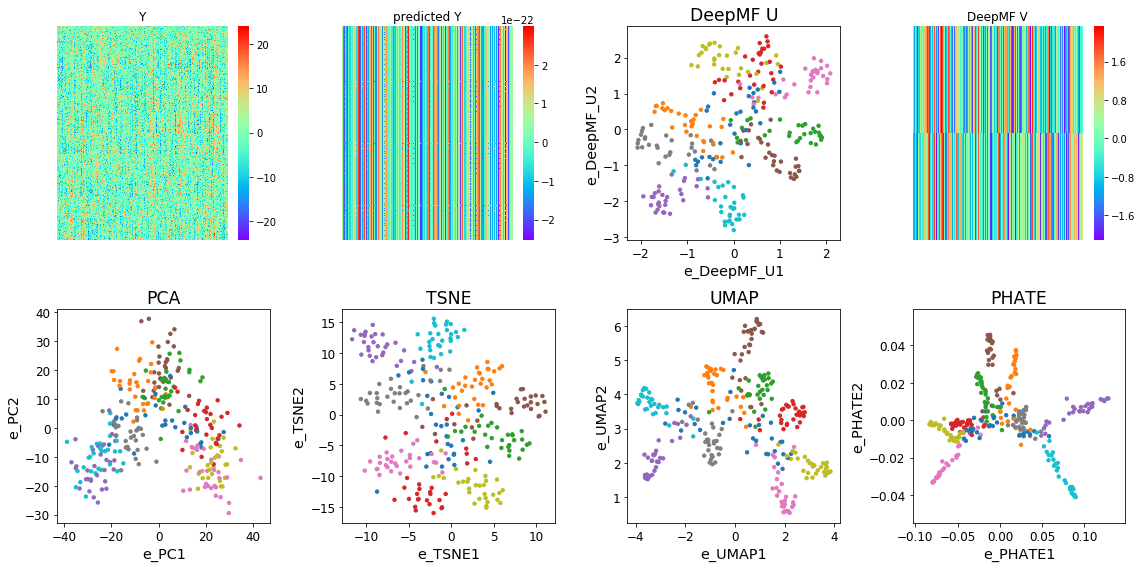

In [82]:
import run_deepmf
run_deepmf.plot_embedding(data, y_pred, U_df, V, meta_df, cluster_label, pca_df, tsne_df, umap_df, phate_df)

In [58]:
D = torch.randn(3,3).abs()
print(D)

knn = D.topk(2, largest=False)
sigma = knn.values[:, -1].repeat(1,D.shape[0],1)
S = torch.exp(-D/(2*sigma*sigma))
print(S)
print(D > sigma)
S[D > sigma] = 0
print(S)

tensor([[1.1630, 1.9483, 1.6258],
        [0.4654, 0.1424, 1.3892],
        [0.7559, 0.1732, 1.0601]])
tensor([[[0.8025, 0.0111, 0.2411],
         [0.9157, 0.7199, 0.2965],
         [0.8668, 0.6704, 0.3955]]])
tensor([[[0, 1, 1],
         [0, 0, 1],
         [0, 0, 1]]], dtype=torch.uint8)
tensor([[[0.8025, 0.0000, 0.0000],
         [0.9157, 0.7199, 0.0000],
         [0.8668, 0.6704, 0.0000]]])
